In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# get the feature name from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()] #Split the individual feature names and put them into a single list.
print('No of Features: {}\n'.format(len(features)))
print("Display the first 20 feature names.\n")
print(features[0:20])

No of Features: 561

Display the first 20 feature names.

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X']


## Obtain the  train data 

In [3]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['Subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True) #Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30.

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# put all columns in a single dataframe
X_train['Activity'] = y_train
X_train['ActivityName'] = y_train_labels
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
X_train.shape

(7352, 564)

## Obtain the  test data 

In [5]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['Subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# put all columns in a single dataframe
X_test['Activity'] = y_test
X_test['ActivityName'] = y_test_labels
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [6]:
X_test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [7]:
print('No of duplicates in train data: {}'.format(sum(X_train.duplicated())))
print('No of duplicates in test data: {}'.format(sum(X_test.duplicated())))

No of duplicates in train data: 0
No of duplicates in test data: 0


## 2. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train data'.format(X_train.isnull().values.sum()))
print('We have {} NaN/Null values in test data'.format(X_test.isnull().values.sum()))

We have 0 NaN/Null values in train data
We have 0 NaN/Null values in test data


## 3. Check for data imbalance

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

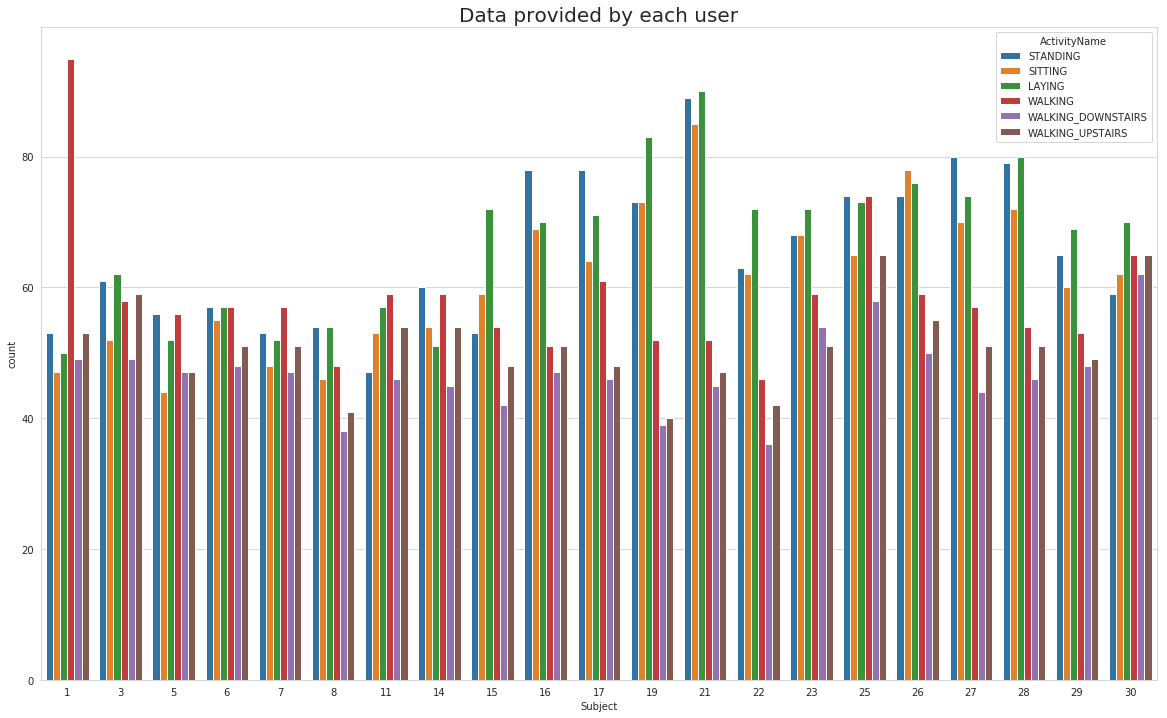

In [10]:
plt.figure(figsize=(20,12))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='Subject',hue='ActivityName', data = X_train)
plt.show()

> We have got almost same number of reading from all the subjects

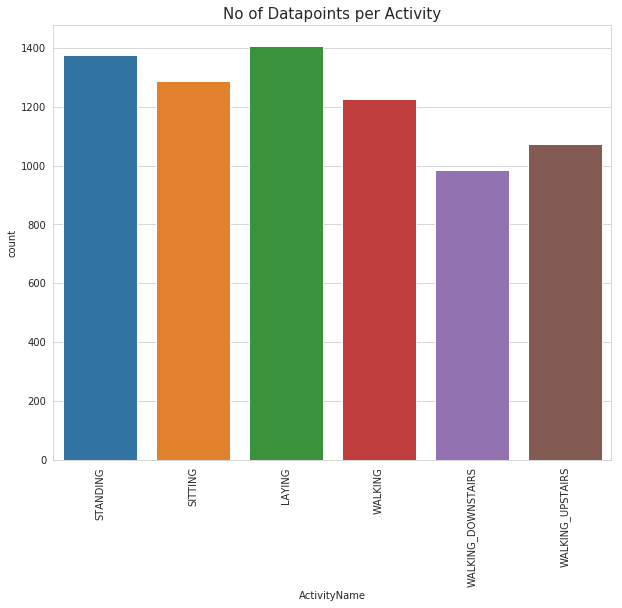

In [11]:
plt.figure(figsize=(10,8))
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(X_train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well almost well balanced. Now we can go ahead and apply some machine learning algortihms later, to see how this dataset behaves.

## 4. Changing feature names 

In [12]:
columns = X_train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

X_train.columns = columns
X_test.columns = columns

print(X_test.columns)

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)


## 5. Save this dataframe in a csv files

In [14]:
X_train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
X_test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion information will be significantly useful.




### 2. Stationary and Moving activities are completely different

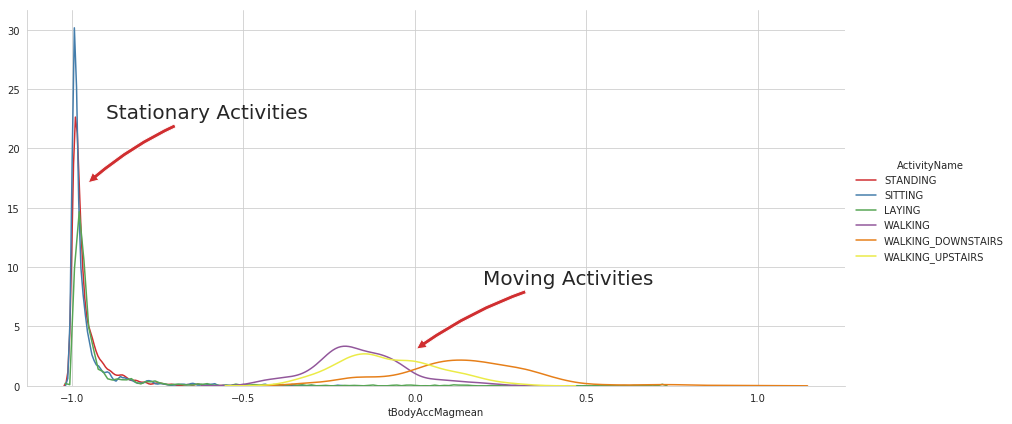

In [16]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(X_train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

As we can clearly see from the above plots, stationary activities can be clearly separated from from moving activities!

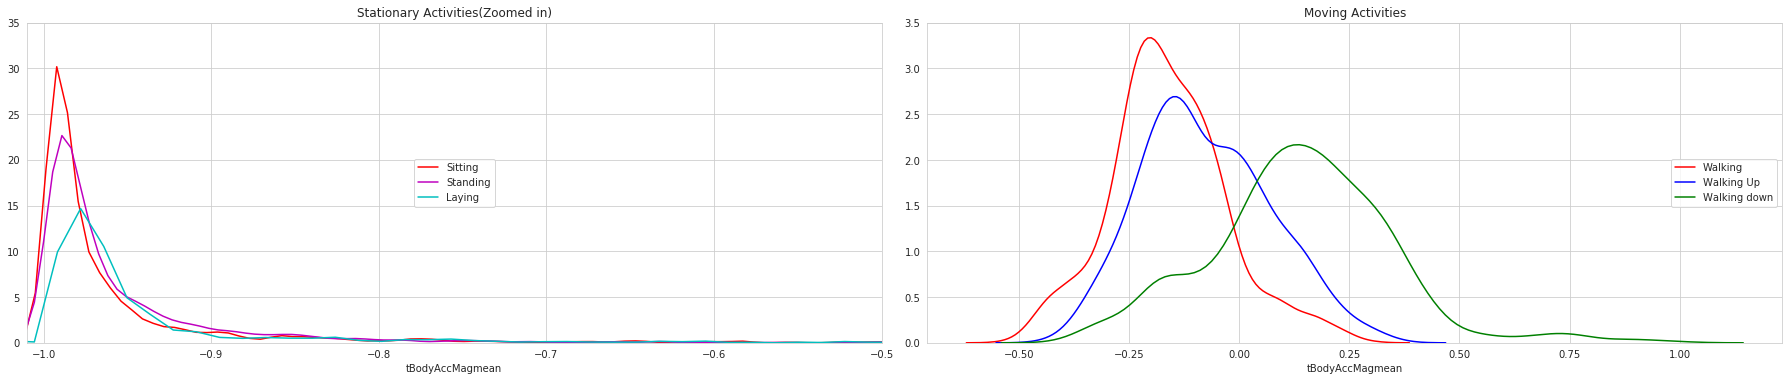

In [17]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = X_train[X_train['Activity']==1]
df2 = X_train[X_train['Activity']==2]
df3 = X_train[X_train['Activity']==3]
df4 = X_train[X_train['Activity']==4]
df5 = X_train[X_train['Activity']==5]
df6 = X_train[X_train['Activity']==6]

plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

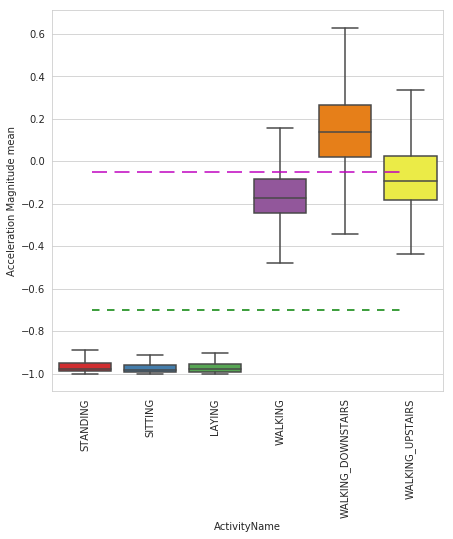

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=X_train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.1, xmax=0.9, dashes=(10,5), c='m')
plt.xticks(rotation=90)
plt.show()

<h3> Observations: </h3>

1. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
2. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If tAccMean > 0.0 then the Activity is WalkingDownstairs.
4. We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

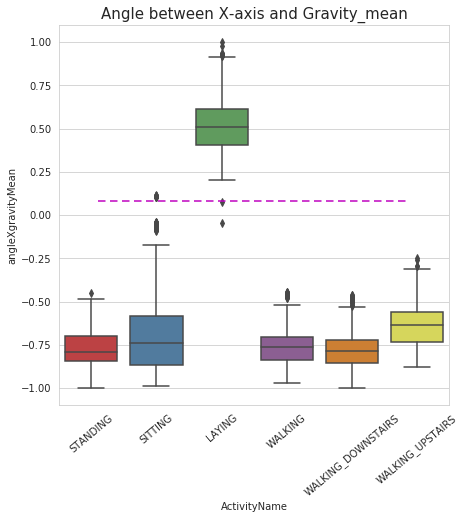

In [19]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=X_train, showfliers=True)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

<h3> Observations: </h3>

1. If angleXgravityMean > 0 then Activity is Laying.
2. We can classify all datapoints belonging to Laying activity with just a single if else statement.

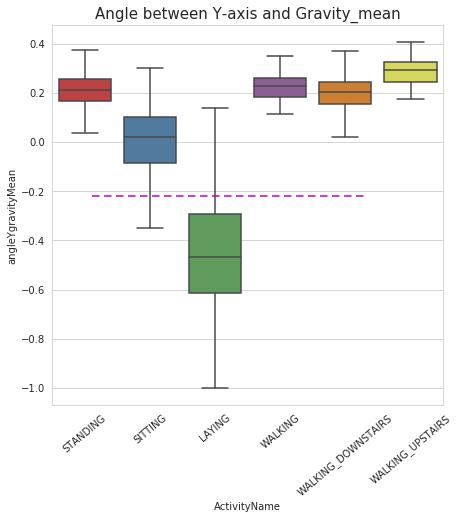

In [20]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = X_train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

<h3> Observations: </h3>

1. If angleYgravityMean < 0.2 then mostly the Activity is Laying.
2. We can classify all datapoints belonging to Laying activity with just a single if else statement.

# Apply t-sne on the data to perform Visualization tasks!

In [21]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# performs t-sne with different perplexity values and their repective plots..
# visit https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for more information on what t-sne is and how to use it.

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nPerforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_train_tsne = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn and save individual datasets         
        print('Creating plot for this t-sne visualization..')
        tsne_df = pd.DataFrame({'x':X_train_tsne[:,0], 'y':X_train_tsne[:,1] ,'label':y_data})
        tsne_db_name=img_name_prefix + '_perp_{}_iter_{}.csv'.format(perplexity, n_iter)
        print('Saving this DB as a DB in present working directory...')
        tsne_df.to_csv(tsne_db_name, index=False)
        print('Done')
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=tsne_df, x='x', y='y', hue='label', fit_reg=False, size=8, palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("Perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('Saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


Performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.349s...
[t-SNE] Computed neighbors for 7352 samples in 48.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.084s
[t-SNE] Iteration 50: error = 124.7606659, gradient norm = 0.0229087 (50 iterations in 11.302s)
[t-SNE] Iteration 100: error = 107.5081482, gradient norm = 0.0285470 (50 iterations i

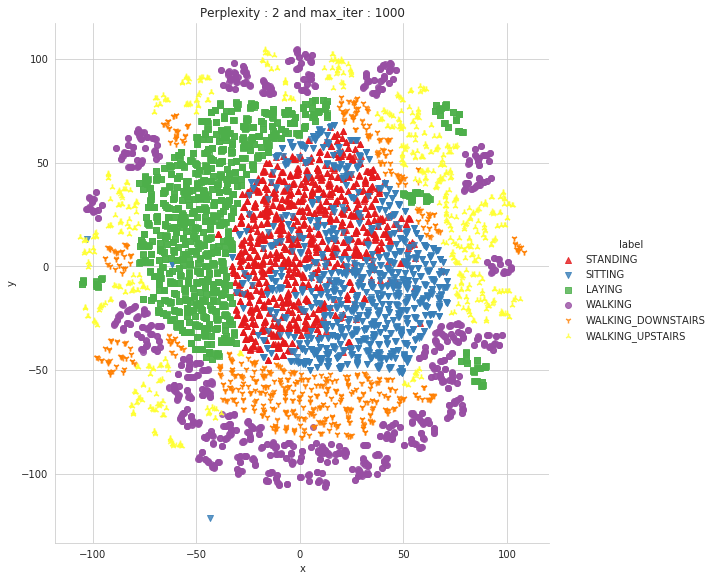

Done

Performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.243s...
[t-SNE] Computed neighbors for 7352 samples in 48.768s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.083s
[t-SNE] Iteration 50: error = 113.9897690, gradient norm = 0.0206356 (50 iterations in 10.359s)
[t-SNE] Iteration 100: error = 97.6493607, gradient norm = 0.0178257 (50 iterati

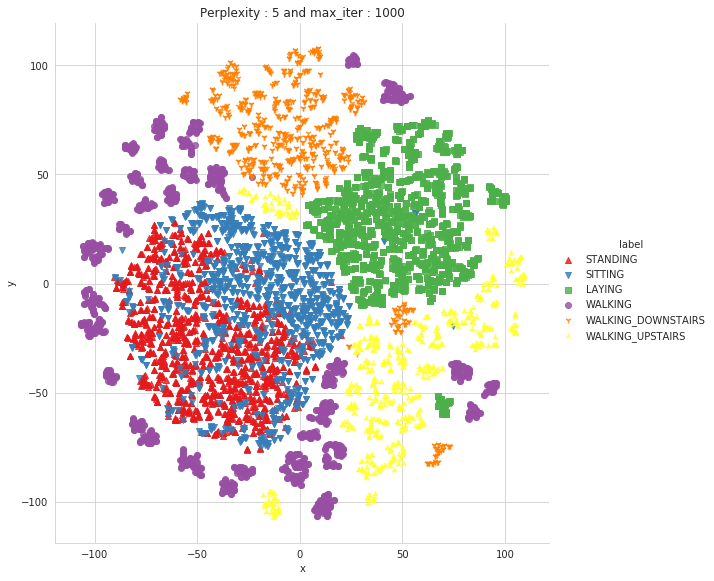

Done

Performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.232s...
[t-SNE] Computed neighbors for 7352 samples in 49.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.154s
[t-SNE] Iteration 50: error = 105.6666641, gradient norm = 0.0183592 (50 iterations in 9.590s)
[t-SNE] Iteration 100: error = 90.3542175, gradient norm = 0.0116167 (50 iterati

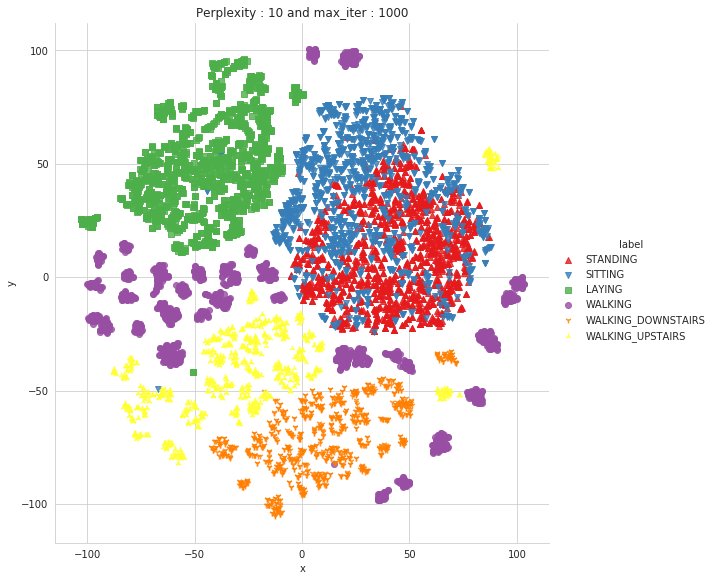

Done

Performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.242s...
[t-SNE] Computed neighbors for 7352 samples in 50.678s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.292s
[t-SNE] Iteration 50: error = 97.5011597, gradient norm = 0.0187989 (50 iterations in 10.463s)
[t-SNE] Iteration 100: error = 84.0547714, gradient norm = 0.0064691 (50 iterati

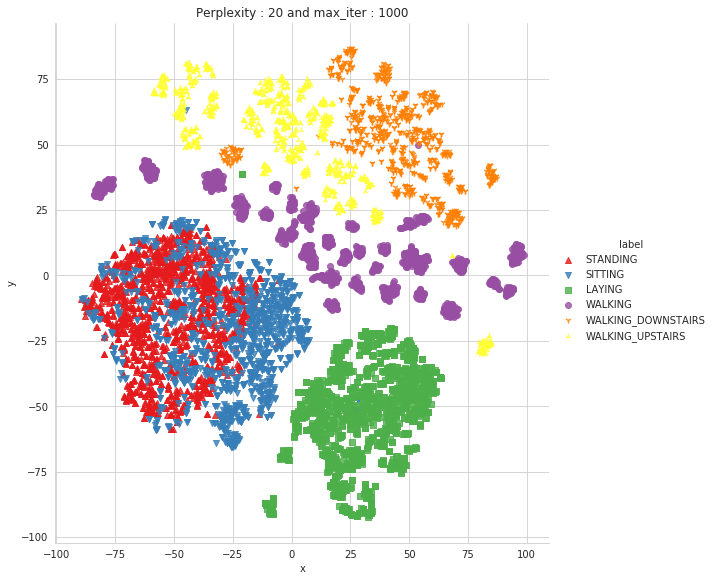

Done

Performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.242s...
[t-SNE] Computed neighbors for 7352 samples in 91.278s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.900s
[t-SNE] Iteration 50: error = 85.9436646, gradient norm = 0.0260563 (50 iterations in 18.641s)
[t-SNE] Iteration 100: error = 75.5011444, gradient norm = 0.0038065 (50 iterat

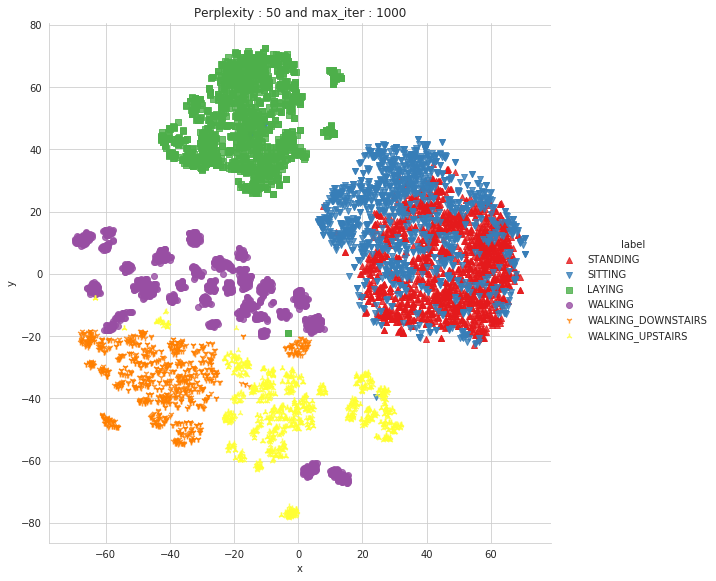

Done


In [39]:
y_train = X_train['ActivityName']
X_train = X_train.drop(['Subject', 'Activity','ActivityName'], axis=1)
perform_tsne(X_data = X_train,y_data=y_train, perplexities =[2,5,10,20,50])

### OBservation from the above t-SNE plots

1. For perplexity = 2 and max_iter = 1000, we can clearly see that the classes are not very well seperated from each other. We can seperate out the majority of 'Laying' activites from the rest of the classes. However, there is a considerable amount of overlap as far as other classes are concerned.

2. For perplexity = 5 and max_iter = 1000, We again notice that the data is not wholely inseperable. 'Walking Downstais' can be seperated well from 'Layin'. 'Walking' activity is scattered over the entire 2D grid. There is a considerable amount of overlap between 'Standing' abd 'Sitting'. 

3. For perplexity = 10 and max_iter = 1000, we can see 'Laying' activities are well separated from the rest. It's also possible to seprate the 'Walking' activities, but they are scattered all over the region. We can also separate these two activities very well from one another - 'Walking Upstairs' and 'Walking Downstairs'. Lastly, we are still unable to seperate 'Sitting' and 'Standing' activities from each other.

4. For perplexity = 20 and max_iter = 1000, we can seperate all four classes of data fairly well. These four activities that can be sperated well are 'Laying', 'Walking', 'Walking Downstairs' and 'Walking Upstairs'. However, we still cannot seperate 'Standing' activities from 'Sitting'

5. For perplexity = 50 and max_iter = 1000, same as above, we can seperate all four classes of data fairly well. These four activities that can be sperated well are 'Laying', 'Walking', 'Walking Downstairs' and 'Walking Upstairs'. We still cannot seperate 'Standing' activities from 'Sitting'


### Utility functions to assess model performance

In [8]:
#Train vs Test loss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

#This function is used to plot/update the train and test loss after each epoch.
def plt_dynamic_loss(x, vy, ty, ax, colors=['b']):
    #plt.figure(figsize=(7,7))
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
#Labels are useful to plot the confusion matrix
labels=['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

#Utility function to plot the confusion matrices
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
def plot_confusion_matrix(cm_df, classes, normalize, title):
    if normalize:
        cm = cm_df.values
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        plt.figure(figsize = (7,7))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
    
    else:
        import seaborn as sn
        plt.figure(figsize = (6,5))
        ax = sn.heatmap(cm_df, annot=True, fmt='d', cmap=plt.cm.Blues)   #fmt='d' for decimal integer.
        ax.set_xlabel("Predicted Labels")
        ax.set_ylabel("True Labels")
        ax.set_title(title)

#Utility function to design the confusion matrix DF
def get_confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    cm_df =  pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return cm_df

### Apply Deep Learning on Engineered Features

In [9]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [10]:
# Configuring a session
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)

In [11]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [12]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [13]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [14]:
# Loading the train and test data
X_train, X_test, y_train, y_test = load_data()

In [15]:
X_train.shape #X_train contains 7352 entries. Each data point has 9 distinct features. Each feature is represented by a 128 dimensional vector

(7352, 128, 9)

In [49]:
#Vector representation of a single feature
X_train[0]

array([ 0.01013856,  0.00657948,  0.05512483,  0.04371071,  0.04269897,
        0.01031572,  1.022833  , -0.1268756 ,  0.1056872 ])

In [17]:
#Number of features for one datapoint
X_train[0][0]

array([ 1.808515e-04,  1.076681e-02,  5.556068e-02,  3.019122e-02,
        6.601362e-02,  2.285864e-02,  1.012817e+00, -1.232167e-01,
        1.029341e-01])

In [18]:
#Documentation
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [ ]:
#Read more about the correct way of data normalization: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i
#Normalize the data to avoid exploding gradient problem: https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons

### 1. Defining the Architecture of LSTM. This is our baseline model with 32 LSTM Units.

In [20]:
import warnings
warnings.filterwarnings("ignore")

# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32 #32 LSTM Units

# Initiliazing the sequential model1
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


### Compiling and Training the model

In [21]:
# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
# Training the model
model1.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 55s 7ms/step - loss: 1.3914 - acc: 0.3570 - val_loss: 1.3154 - val_acc: 0.3505
Epoch 2/30
7352/7352 [==============================] - 54s 7ms/step - loss: 1.1624 - acc: 0.4656 - val_loss: 1.2046 - val_acc: 0.4506
Epoch 3/30
7352/7352 [==============================] - 54s 7ms/step - loss: 1.0288 - acc: 0.5325 - val_loss: 0.9904 - val_acc: 0.5063
Epoch 4/30
7352/7352 [==============================] - 54s 7ms/step - loss: 0.8890 - acc: 0.6119 - val_loss: 0.8544 - val_acc: 0.5877
Epoch 5/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.7884 - acc: 0.6469 - val_loss: 0.8368 - val_acc: 0.6064
Epoch 6/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.7299 - acc: 0.6673 - val_loss: 0.8442 - val_acc: 0.6206
Epoch 7/30
7352/7352 [==============================] - 54s 7ms/step - loss: 0.7060 - acc: 0.6719 - val_loss: 0.7821 - val_acc: 0.6413
Epoch 8

### Score evaluation

In [24]:
results = []
#Plot the train and test loss vs number of epochs
score_test = model1.evaluate(X_test, y_test, verbose=1) 
score_train = model1.evaluate(X_train, y_train, verbose=1) 

print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])

print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])

scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
results.append(scores)

7352/7352 [==============================] - 5s 742us/step

Validation accuracy: 0.8900576857821514
Train Accuracy: 0.9504896626768227

Validation Loss: 0.3715693044099767
Train Loss: 0.12927464863579438


- With a simple 2 layer architecture we got 89% accuracy and a loss of 0.37. Not bad by any means, considering the fact that we did not do any feature engineering whatsoever!
- Looking at the train and test loss, we can say there might be a small overfitting.
- We can further improve the performace with Hyperparameter tuning. For now let's plot the Train vs Cross Validation Loss, and also the Confusion Matrix to get an idea about individual class accuracies, precisions, recalls.

### Plot the Train and Validation loss for all epochs to get an idea if our model is overfitted/underfitted.

In [25]:
history1=model1.history #Get the history object which stores all the histories of test/train/validation loss/accuracy

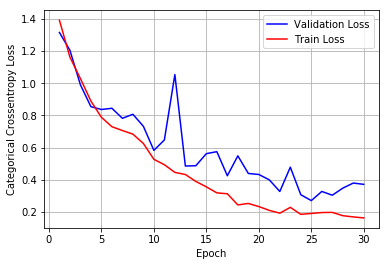

In [26]:
#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,epochs+1))

#Display the model
val_loss = history1.history['val_loss'] #Validation Loss
loss = history1.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)

### Plot Confusion Matrices to evaluate the model.

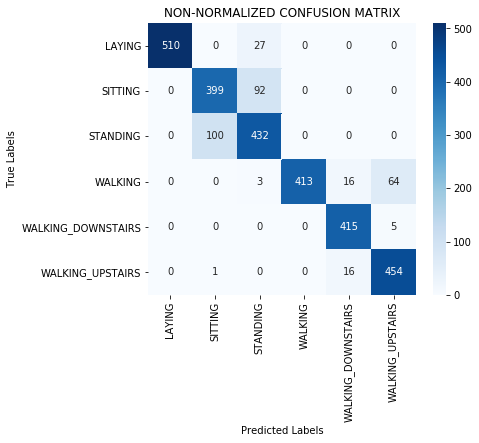

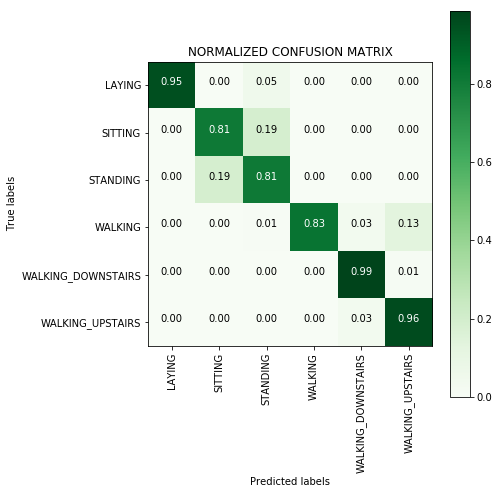

In [28]:
#Get the confusion matrix
y_pred=model1.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df

#Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX")

#Plot a Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX")

## Manual Hyperparameter tuning Section. 

### 2. Model with 1 LSTM Layer having 16 LSTM units

In [29]:
import warnings
warnings.filterwarnings("ignore")

'''Initializing parameters'''
epochs = 30
batch_size = 16
n_hidden = 16 #16 LSTM Units

'''Define and train the model'''
model2 = Sequential() # Initiliazing the sequential model2
model2.add(LSTM(n_hidden, input_shape=(timesteps, input_dim))) # Configuring the parameters
model2.add(Dropout(0.5)) # Adding a dropout layer
model2.add(Dense(n_classes, activation='sigmoid')) # Adding a dense output layer with sigmoid activation
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Compiling the model
model2.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs) # Training the model

'''Get the history object which stores all the histories of test/train/validation loss/accuracy'''
history2=model2.history 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                1664      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 102       
Total params: 1,766
Trainable params: 1,766
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 47s 6ms/step - loss: 1.4984 - acc: 0.3754 - val_loss: 1.2799 - val_acc: 0.4639
Epoch 2/30
7352/7352 [==============================] - 46s 6ms/step - loss: 1.1144 - acc: 0.5024 - val_loss: 1.0527 - val_acc: 0.5290
Epoch 3/30
7352/7352 [==============================] - 46s 6ms/step - loss: 0.9615 - 

In [30]:
'''Get the train and test loss'''
score_test = model2.evaluate(X_test, y_test, verbose=1) 
score_train = model2.evaluate(X_train, y_train, verbose=1) 
print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])
print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])
scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
results.append(scores)

7352/7352 [==============================] - 4s 597us/step

Validation accuracy: 0.8588394977943672
Train Accuracy: 0.9390642002176278

Validation Loss: 0.408878297718513
Train Loss: 0.22015159318167352


By using just a single LSTM layer with 16 LSTM units, we have obtained a test loss of 0.22 and test accuracy of 85%. However, our model looks overfitted. We will try to reduce the overfitting by using aggressive dropouts. We will also use Batch Normalization.

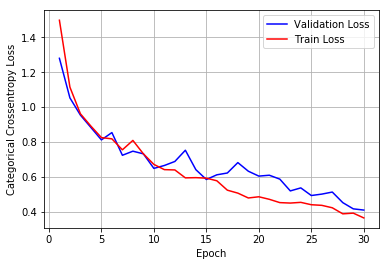

In [31]:
'''Plot train vs test loss'''
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) #List of epoch numbers
val_loss = history2.history['val_loss'] #Validation Loss
loss = history2.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax) #Display the model

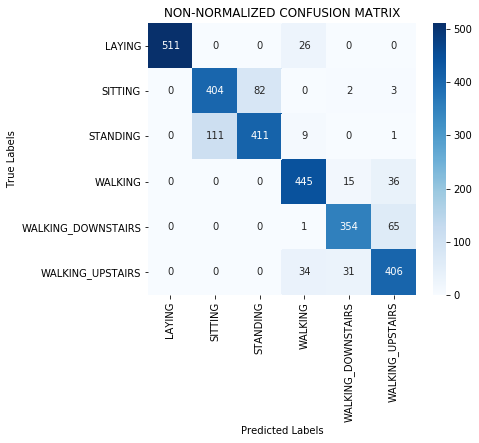

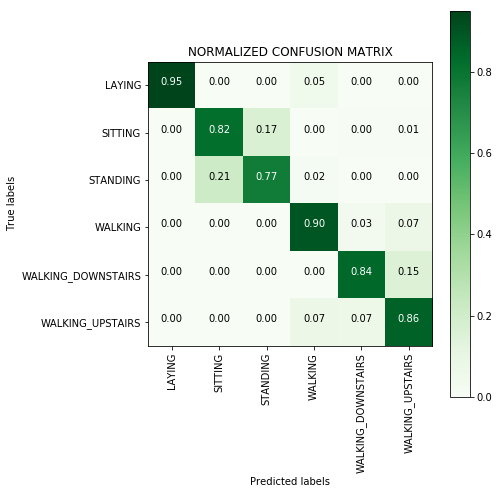

In [32]:
'''Plot the confusion matrix'''
y_pred=model2.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX") #Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX") #Plot a Normalized confusion matrix

### 3. Model with 1 LSTM Layer having 64 LSTM units + Larger Dropout (0.55)

In [40]:
import warnings
warnings.filterwarnings("ignore")
from keras.layers.normalization import BatchNormalization

'''Initializing parameters'''
epochs = 30
batch_size = 16

model3 = Sequential()
model3.add(LSTM(64, input_shape=(timesteps, input_dim))) 
model3.add(Dropout(0.55)) 
model3.add(Dense(n_classes, activation='sigmoid')) 
model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
model3.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs) 

'''Get the history object which stores all the histories of test/train/validation loss/accuracy'''
history3=model3.history 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 68s 9ms/step - loss: 1.2470 - acc: 0.4550 - val_loss: 1.1369 - val_acc: 0.5205
Epoch 2/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.9726 - acc: 0.5812 - val_loss: 0.9422 - val_acc: 0.6071
Epoch 3/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.7902 

In [41]:
'''Get the train and test loss'''
score_test = model3.evaluate(X_test, y_test, verbose=1) 
score_train = model3.evaluate(X_train, y_train, verbose=1) 
print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])
print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])
scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
results.append(scores)

7352/7352 [==============================] - 10s 1ms/step

Validation accuracy: 0.9046487953851374
Train Accuracy: 0.955386289445049

Validation Loss: 0.3438886410414397
Train Loss: 0.12301450312815183


We have able to manage to increase the accuracy to more than 90. Not bad. We will experiment with some more options. We will try with 128 LSTM units and see where things goes. But, we will use a dropout of 0.5. Using 0.6 or 0.7 gave me a exploding gradient problem. Tried a few things like adding decay to the RMSProp optimizer, adding a very small epsilon value. None of them seems to work though.

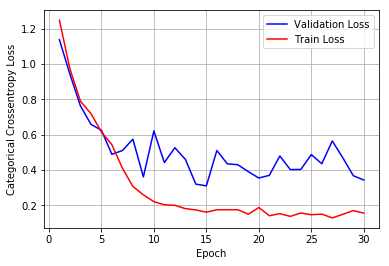

In [42]:
'''Plot train vs test loss'''
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) #List of epoch numbers
val_loss = history3.history['val_loss'] #Validation Loss
loss = history3.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax) #Display the model

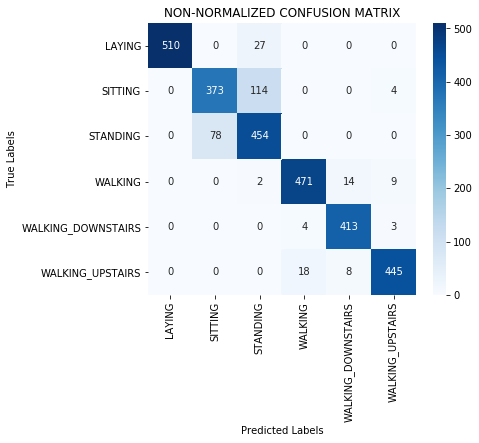

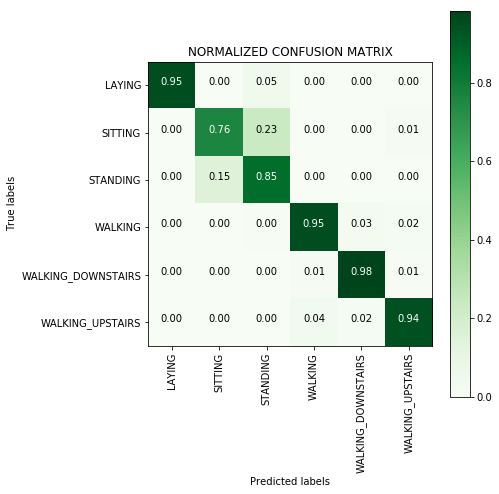

In [43]:
'''Plot the confusion matrix'''
y_pred=model3.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX") #Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX") #Plot a Normalized confusion matrix

### 4. Model with 1 LSTM Layer having 128 LSTM units + Batch Normalization

In [47]:
import keras
import warnings
warnings.filterwarnings("ignore")

'''Initializing parameters'''
epochs = 30
batch_size = 16

'''Define and train the model'''
model4 = Sequential() # Initiliazing the sequential model3
model4.add(LSTM(128, input_shape=(timesteps, input_dim))) # Configuring the parameters
model4.add(BatchNormalization())
model4.add(Dropout(0.40)) # Adding a dropout layer
model4.add(Dense(n_classes, activation='sigmoid')) # Adding a dense output layer with sigmoid activation
model4.summary()
optim=keras.optimizers.RMSprop(epsilon=0.00001, decay=1e-6, clipnorm =1)
model4.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy']) # Compiling the model
model4.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs) # Training the model

'''Get the history object which stores all the histories of test/train/validation loss/accuracy'''
history4=model4.history 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128)               70656     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 774       
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 122s 17ms/step - loss: 1.0806 - acc: 0.5301 - val_loss: 1.2823 - val_acc: 0.5277
Epoch 2/30
7352/7352 [==============================] - 116s 16ms/step - loss: 0.80

In [50]:
'''Get the train and test loss'''
score_test = model4.evaluate(X_test, y_test, verbose=1) 
score_train = model4.evaluate(X_train, y_train, verbose=1) 
print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])
print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])
scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
results.append(scores)

7352/7352 [==============================] - 20s 3ms/step

Validation accuracy: 0.9246691550729556
Train Accuracy: 0.9638193688792165

Validation Loss: 0.5163178581935218
Train Loss: 0.09821970019688424


We have reached an accuracy of more than 92% at the end of 30 epoch. This is good considering the fact that we did not do any feature engineering whatsoever. However, there is still a lot of overfitting.

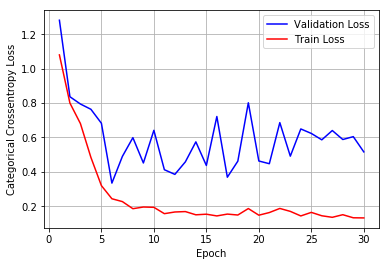

In [51]:
'''Plot train vs test loss'''
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) #List of epoch numbers
val_loss = history4.history['val_loss'] #Validation Loss
loss = history4.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax) #Display the model

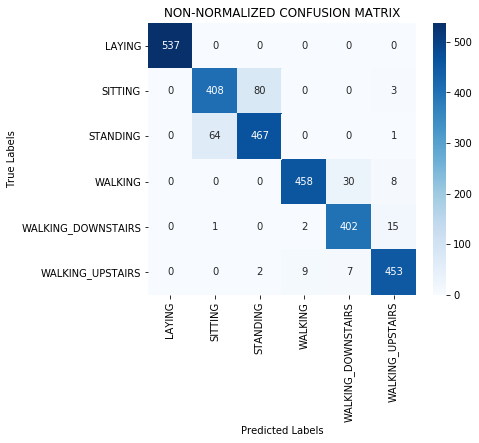

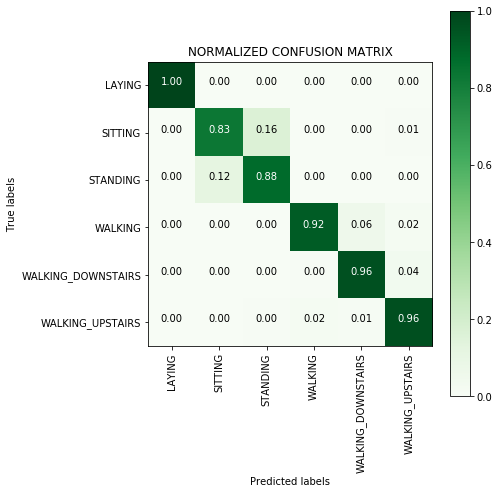

In [52]:
'''Plot the confusion matrix'''
y_pred=model4.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX") #Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX") #Plot a Normalized confusion matrix

### 5. Model with 2 LSTM Layers having 32 LSTM units + Dropout (0.5)

In [53]:
import warnings
warnings.filterwarnings("ignore")

'''Initializing parameters'''
epochs = 30
batch_size = 16
n_hidden = 32 #32 LSTM Units

'''Define and train the model'''
model5 = Sequential() # Initiliazing the sequential model5
model5.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) # First LSTM Layer
model5.add(Dropout(0.5)) # Adding a dropout layer
model5.add(LSTM(n_hidden, input_shape=(timesteps, input_dim))) # Second LSTM Layer
model4.add(BatchNormalization()) # Adding batch normalization
model5.add(Dropout(0.5)) # Adding a dropout layer
model5.add(Dense(n_classes, activation='sigmoid')) # Adding a dense output layer with sigmoid activation
model5.summary()
model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Compiling the model
model5.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs) # Training the model

'''Get the history object which stores all the histories of test/train/validation loss/accuracy'''
history5=model5.history 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 198       
Total params: 13,894
Trainable params: 13,894
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 109s 15ms/step - loss: 1.2561 - ac

In [54]:
'''Get the train and test loss'''
score_test = model5.evaluate(X_test, y_test, verbose=1) 
score_train = model5.evaluate(X_train, y_train, verbose=1) 
print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])
print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])
scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
results.append(scores)

7352/7352 [==============================] - 12s 2ms/step

Validation accuracy: 0.9117746861214795
Train Accuracy: 0.9560663764961915

Validation Loss: 0.5181261586724718
Train Loss: 0.10325091436454774


Here, even though the accuracy obtained is slightly lower than that obtained from a 128 layers LSTM unit, the overfitting has reduced slightly using a two layer LSTM architecture. This is a good news.

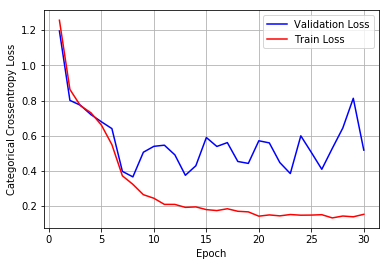

In [55]:
'''Plot train vs test loss'''
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) #List of epoch numbers
val_loss = history5.history['val_loss'] #Validation Loss
loss = history5.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax) #Display the model

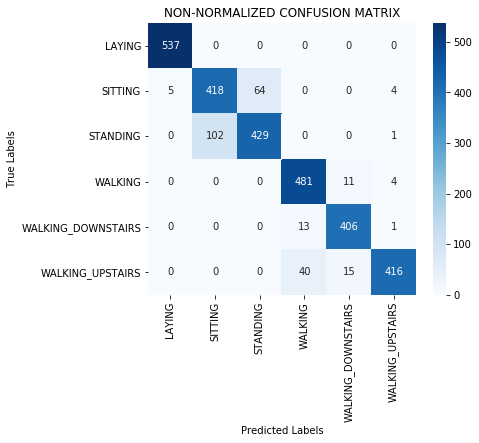

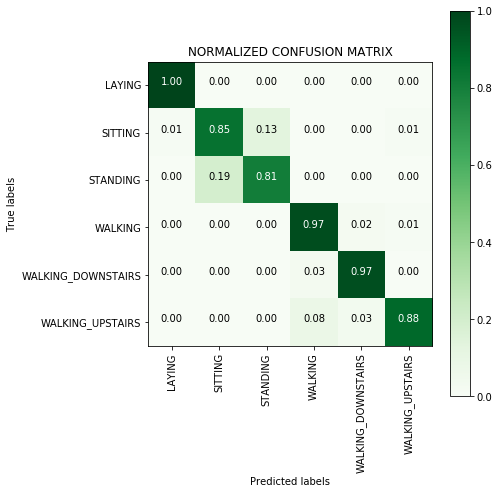

In [57]:
'''Plot the confusion matrix'''
y_pred=model5.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX") #Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX") #Plot a Normalized confusion matrix

### 6. Model with 2 LSTM Layers having 64 LSTM units + Dropout (0.5)

In [45]:
import warnings
warnings.filterwarnings("ignore")

'''Initializing parameters'''
epochs = 30
batch_size = 16
n_hidden = 64 #64 LSTM Units

'''Define and train the model'''
model6 = Sequential() # Initiliazing the sequential model6
model6.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) # First LSTM Layer
model6.add(Dropout(0.5)) # Adding a dropout layer
model6.add(LSTM(n_hidden, input_shape=(timesteps, input_dim))) # Second LSTM Layer
model6.add(BatchNormalization()) # Adding batch normalization
model6.add(Dropout(0.5)) # Adding a dropout layer
model6.add(Dense(n_classes, activation='sigmoid')) # Adding a dense output layer with sigmoid activation
model6.summary()
model6.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Compiling the model
model6.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs) # Training the model

'''Get the history object which stores all the histories of test/train/validation loss/accuracy'''
history6=model6.history 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                33024     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 52,614
Trainable params: 52,486
Non-trainable params: 128
_________________________________________________________________
Trai

In [47]:
'''Get the train and test loss'''
score_test = model6.evaluate(X_test, y_test, verbose=1) 
score_train = model6.evaluate(X_train, y_train, verbose=1) 
print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])
print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])
scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
results.append(scores)

7352/7352 [==============================] - 8s 1ms/step

Validation accuracy: 0.9284017645062775
Train Accuracy: 0.9590587595212187

Validation Loss: 0.2721661016743234
Train Loss: 0.09725932769406556


Of all the models we have trained so far, this one looks like the leats overfitted model. Train accuracy of 95.9% and test accuracy of 92.84% is not bad!

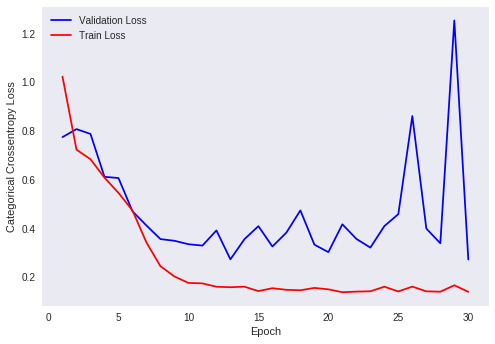

In [48]:
'''Plot train vs test loss'''
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) #List of epoch numbers
val_loss = history6.history['val_loss'] #Validation Loss
loss = history6.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax) #Display the model

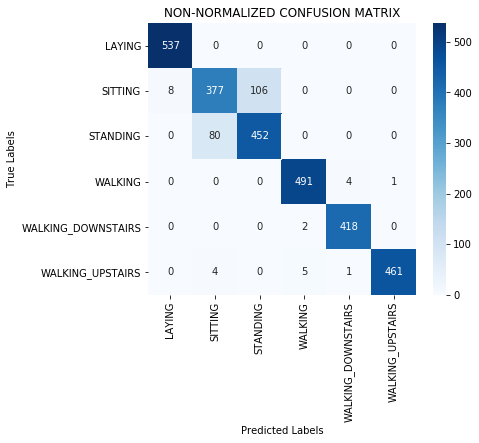

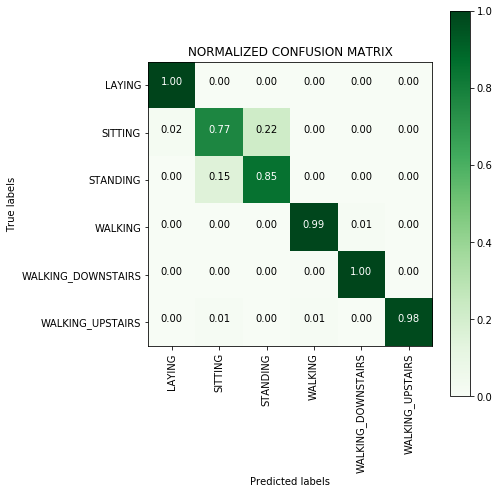

In [63]:
'''Plot the confusion matrix'''
y_pred=model6.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX") #Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX") #Plot a Normalized confusion matrix

### 7. Model with 2 LSTM Layers having 128 LSTM units + Dropout (0.5)

In [52]:
import warnings
warnings.filterwarnings("ignore")

'''Initializing parameters'''
epochs = 30
batch_size = 16
n_hidden = 128 #64 LSTM Units

'''Define and train the model'''
model7 = Sequential() # Initiliazing the sequential model7
model7.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim))) # First LSTM Layer
model7.add(Dropout(0.3)) # Adding a dropout layer
model7.add(LSTM(n_hidden, input_shape=(timesteps, input_dim))) # Second LSTM Layer
model7.add(BatchNormalization()) # Adding batch normalization
model7.add(Dropout(0.3)) # Adding a dropout layer
model7.add(Dense(n_classes, activation='sigmoid')) # Adding a dense output layer with sigmoid activation
model7.summary()
model7.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Compiling the model
model7.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test), epochs=epochs) # Training the model

'''Get the history object which stores all the histories of test/train/validation loss/accuracy'''
history7=model7.history 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128, 128)          70656     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               131584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 203,526
Trainable params: 203,270
Non-trainable params: 256
_________________________________________________________________
Tr

In [60]:
'''Get the train and test loss'''
score_test = model7.evaluate(X_test, y_test, verbose=1) 
score_train = model7.evaluate(X_train, y_train, verbose=1) 
print('\nValidation accuracy:', score_test[1])
print('Train Accuracy:', score_train[1])
print('\nValidation Loss:', score_test[0]) 
print('Train Loss:', score_train[0])
scores = [score_test[1], score_train[1], score_test[0], score_train[0]]
#results.append(scores)

7352/7352 [==============================] - 49s 7ms/step

Validation accuracy: 0.9043094672548354
Train Accuracy: 0.9469532100108814

Validation Loss: 0.4427679502186182
Train Loss: 0.14726596881023452


Here also, there is a significant amount of overfitting.

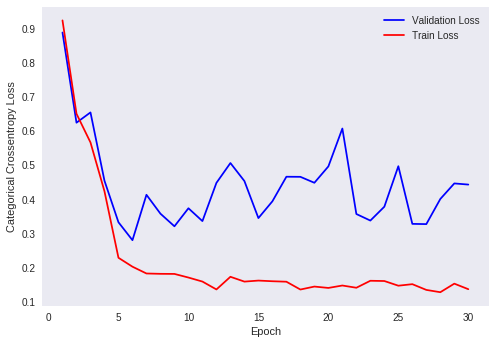

In [55]:
'''Plot train vs test loss'''
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1)) #List of epoch numbers
val_loss = history7.history['val_loss'] #Validation Loss
loss = history7.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax) #Display the model

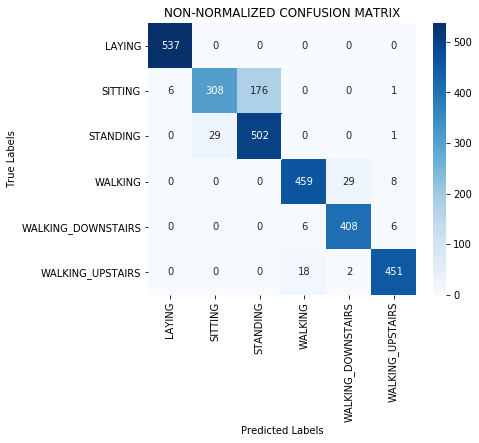

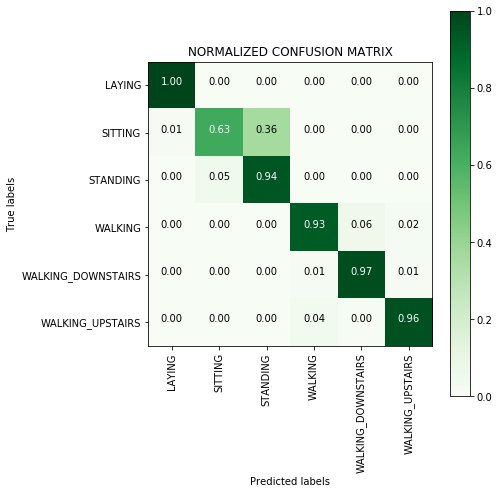

In [61]:
'''Plot the confusion matrix'''
y_pred=model6.predict(X_test)
cm_df=get_confusion_matrix(y_test, y_pred) #Prepare the confusion matrix by using get_confusion_matrix() defined above.
classes=list(cm_df.index) #Class names = Index Names or Column Names in cm_df
plot_confusion_matrix(cm_df, classes, normalize=False, title="NON-NORMALIZED CONFUSION MATRIX") #Plot a Non-Normalized confusion matrix
plot_confusion_matrix(cm_df, classes, normalize=True, title="NORMALIZED CONFUSION MATRIX") #Plot a Normalized confusion matrix

In [ ]:
"""### Explanation from: https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons
There are lots of things I have seen make a model diverge.
1. Too high of a learning rate. You can often tell if this is the case if the loss begins to increase and then diverges to infinity.I am not to familiar with the DNNClassifier but I am guessing it uses the categorical cross entropy cost function. This involves taking the log of the prediction which diverges as the prediction approaches zero. That is why people usually add a small epsilon value to the prediction to prevent this divergence. I am guessing the DNNClassifier probably does this or uses the tensorflow opp for it. Probably not the issue.
2. Other numerical stability issues can exist such as division by zero where adding the epsilon can help. Another less obvious one if the square root who's derivative can diverge if not properly simplified when dealing with finite precision numbers. Yet again I doubt this is the issue in the case of the DNNClassifier.
3. You may have an issue with the input data. Try calling assert not np.any(np.isnan(x)) on the input data to make sure you are not introducing the nan. Also make sure all of the target values are valid. Finally, make sure the data is properly normalized. You probably want to have the pixels in the range [-1, 1] and not [0, 255].
4. The labels must be in the domain of the loss function, so if using a logarithmic-based loss function all labels must be non-negative (as noted by evan pu and the comments below).
"""

## Hyperparameter tuning using Hyperas. This section of code is not executed. Facing problems with hyperas. Dependency and bug issues. Don't run this.

In [70]:
"""
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
#ImportError: cannot import name 'conditional' from 'hyperas.distributions' (/root/anaconda3/lib/python3.7/site-packages/hyperas/distributions.py)

X_train, X_test, y_train, y_test = load_data()

#Defining a data function which is used by Hyperas. This data function directly loads train and test data from the source 
def data_func():
    X_train = X_train
    X_test = X_test
    y_train = y_train
    y_test = y_test    
    return X_train, y_train, X_test, y_test

#Defining a model function 
def model_func(X_train, X_test, y_train, y_test):
    
    model = Sequential()
    
    model.add(LSTM(units={{choice([32,48,64,80])}}, activation={{choice(['tanh','relu','sigmoid','softplus'])}},
                   kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01)),
                   input_shape=(timesteps, input_dim),return_sequences=True)
    model.add(Dropout({{uniform(0, 1)}})) # Adding a dropout layer
    #Adding a second LSTM Layer
    model.add(LSTM(units={{choice([32,48,64,80])}}, activation={{choice(['tanh','relu','sigmoid','softplus'])}},
                   kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01)),
                   input_shape=(timesteps, input_dim))
    model.add(BatchNormalization()) # Adding batch normalization     
    model.add(Dropout({{uniform(0, 1)}})) # Adding a dropout layer
    model.add(Dense(n_classes, activation='sigmoid')) # Adding a dense output layer with sigmoid activation    
    
    # Tune the optimzers
    adam = keras.optimizers.Adam(lr={{choice([10**-4,10**-3, 10**-2])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-4,10**-3, 10**-2, 10**-1])}})
    sgd = keras.optimizers.SGD(lr={{choice([10**-4,10**-3, 10**-2])}})
    
    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optimizer = adam
    elif choiceval == 'rmsprop':
        optimizer = rmsprop
    else:
        optimizer = sgd
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Compiling the model
    model.fit(X_train, y_train, batch_size={{choice([16, 32, 64])}}, validation_data=(X_test, y_test), epochs=epochs) # Training the model
    #history=model.history 
    
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

#Run the model
st = dt.now()
if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=model_func,data=data_func,algo=tpe.suggest,max_evals=30,trials=Trials(),notebook_name='HAR_LSTM',verbose=2)
    X_train, X_test, y_train, y_test = load_data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, y_test))
    print("Best performing model chosen hyper-parameters:")
    print(best_run)
print('\nTime taken to perform Hyperparameter tuning:',dt.now()-st)
"""

In [98]:
from prettytable import PrettyTable

print('Performance Table')
x = PrettyTable()
x.field_names =["Model","Test Accuracy","Train Accuracy", "Test Loss", "Train Loss"]

x.add_row(["1 LSTM layer with 32 LSTM Units",results[0][0]*100,results[0][1]*100,results[0][2],results[0][3]])
x.add_row(["1 LSTM layer with 16 LSTM Units",results[1][0]*100,results[1][1]*100,results[1][2],results[1][3]])
x.add_row(["1 LSTM layer with 64 LSTM Units",results[2][0]*100,results[2][1]*100,results[2][2],results[2][3]])
x.add_row(["1 LSTM layer with 128 LSTM Units",results[3][0]*100,results[3][1]*100,results[3][2],results[3][3]])
x.add_row(["2 LSTM layers with 32 LSTM Units",results[4][0]*100,results[4][1]*100,results[4][2],results[4][3]])
x.add_row(["2 LSTM layers with 64 LSTM Units",results[5][0]*100,results[5][1]*100,results[5][2],results[5][3]])
x.add_row(["2 LSTM layer with 128 LSTM Units",results[6][0]*100,results[6][1]*100,results[6][2],results[6][3]])

print(x)

Performance Table
+----------------------------------+-------------------+-------------------+--------------------+---------------------+
|              Model               |   Test Accuracy   |   Train Accuracy  |     Test Loss      |      Train Loss     |
+----------------------------------+-------------------+-------------------+--------------------+---------------------+
| 1 LSTM layer with 32 LSTM Units  | 89.00576857821514 | 95.04896626768226 | 0.3715693044099767 | 0.12927464863579438 |
| 1 LSTM layer with 16 LSTM Units  | 85.88394977943672 | 93.90642002176278 | 0.408878297718513  | 0.22015159318167352 |
| 1 LSTM layer with 64 LSTM Units  | 90.46487953851374 |  95.5386289445049 | 0.3438886410414397 | 0.12301450312815183 |
| 1 LSTM layer with 128 LSTM Units | 92.46691550729555 | 96.38193688792165 | 0.5163178581935218 | 0.09821970019688424 |
| 2 LSTM layers with 32 LSTM Units | 91.17746861214795 | 95.60663764961916 | 0.5181261586724718 | 0.10325091436454774 |
| 2 LSTM layers with 6

### What we did so far:

1. This project was to determine the activity of a human and classify them into one of six classes - WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
2. The data was recorded from 30 users using Gyroscope and accelerometer sensors in a smartphone, where they have captured a '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.
3. There were as many as 561 hand engineered features, which are built by domain experts. 
4. After collecting the data, we moved on to the data cleaning stage - we checked for duplicate entries, checked for null values, checked for data imbalances. Then we moved on to EDA.
5. Simple exploratory data analysis tells us that the moving and stationery activities can be very well seperated from each other. 
6. We have used TSNE in order to reduce the dimensionality of the data and visualize them in 2D. The TSNE plot looks good. There is some form of seperatability. In general, TSNE has been well able to seperate lying, walking, walking downstairs, walking upstais. The model confuses a lot between sitting and standing. Let's move on to building ML models now.
7. We will apply classical ML techniques to the hand engineered dataset with almost 561 hand made features. This gave as an unbelievable accuracy of more than 96% on unseen data. This is pretty good. By looking at all the confusion matrices, we can tell that the model performed fairly well in determining the activities, except that it confuses between sitting and standing for example. In the real world, domain-knowledge, EDA and feature-engineering matters most. In this experiment, without a doubt Logistic Regression and Support Vector Machines are clear winners! They have been pretty good in classifying all the 6 classes of data. That too with very high precision and recall values. The individual F1 scores for each of the predicted classes also has very high values. In general, the Decision Trees did not perform well. Random Forests and GBDTs did better than Decision Trees. But, both RFs and GBDTs performed poorly as compared to the Logistic Regression and SVM models.
9. Now, since we are done with ML tenchinques, let's find out if we can use the raw data to build some deep learning models with better accuracy. 
10. In the deep learning part, no extra features has been hand engineered, we are building models with the raw data as the input. We have tried and experimented with the number of layers, number of LSTM units, optimizers, droput rate etc to see if we can come up with certain parameters which provides a good accuracy.
11. In the deep learning part, we have noticed that the models with 2 LSTM layers performed better than single layered LSTM architectures. Overfitting was reduced, and the accuracy on the unseen data also increases slightly.
12. So, using raw data with with deep learning architectures gace as an accuracy of 92%. This is not bad by any means, cosidering the fact that we did not do any feature engineering whatsoever.
13. The model can be further improved by doing hyperparameter tuning. However, there seems to be a bug in the hyperas official release which hasn't been fixed yet. Will try Hyperas in  future and see what improvements can we make.

In [103]:
#Save results
import pickle as pkl
with open("results.pkl", 'wb') as file:
    pkl.dump(results, file)